In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.3 kB/s 
     |████████████████████████████████| 2.9 MB 60.3 MB/s 
     |████████████████████████████████| 3.8 MB 51.2 MB/s 
     |████████████████████████████████| 503 kB 62.4 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=a6da491a68fb5ebdbf2e137cd3eeec2e611321af1123b873ef2f379421be3df1
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
learning_parameter = 0.01
epochs = 300

In [ ]:
sample_points=50
x_train=np.linspace(0,30,sample_points)
y_train=6*x_train+7*np.random.randn(sample_points)

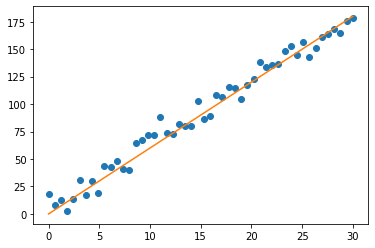

In [ ]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, 6*x_train)
plt.show()

In [ ]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W=tf.Variable(np.random.randn(), name='weights')
B=tf.Variable(np.random.randn(), name='bias')

In [ ]:
prediction=W*X+B
cost_iteration=tf.reduce_sum((prediction-Y)**2)/(2*sample_points)
optimizer=tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)
init=tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epochs 0.000000 Cost 3.453001 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 0.861901 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 2.034942 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 0.228862 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 2.636491 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 11.650286 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 4.696303 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 11.920534 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 5.772235 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 24.245354 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 24.263178 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 30.348312 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 23.246790 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 23.582016 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 54.589954 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 58.796246 Weight -0.961007 Bias -0.652841

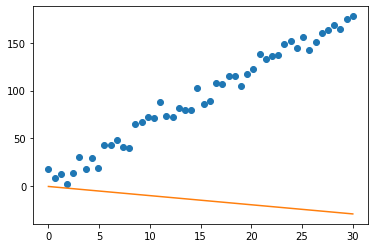

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      if not epoch%40:
        W1=sess.run(W)
        B1=sess.run(B)
        cost_iter=sess.run(cost_iteration, feed_dict={X:x, Y:y})
        print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight=sess.run(W)
  Bias=sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight*x_train+Bias)
  plt.show()

In [ ]:
with tf.name_scope("Model") as scope:
  prediction=W*X+Bias
  weight_histogram=tf.summary.histogram("Weights", W)
  bias_histogram=tf.summary.histogram("Bias", B)

with tf.name_scope("Cost_function") as scope:
  cost_iteration=tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

cost_summary=tf.summary.scalar("Cost", cost_iteration)

In [ ]:
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)
  
  init=tf.global_variables_initializer()

  merged_summary=tf.summary.merge_all()

Epochs 0.000000 Cost 3.453001 Weight -0.961007 Bias -0.652841
Epochs 0.000000 Cost 0.861772 Weight -0.959870 Bias -0.652841
Epochs 0.000000 Cost 2.033325 Weight -0.956377 Bias -0.652841
Epochs 0.000000 Cost 0.227741 Weight -0.954623 Bias -0.652841
Epochs 0.000000 Cost 2.625107 Weight -0.946678 Bias -0.652841
Epochs 0.000000 Cost 11.576843 Weight -0.925807 Bias -0.652841
Epochs 0.000000 Cost 4.615412 Weight -0.909981 Bias -0.652841
Epochs 0.000000 Cost 11.683691 Weight -0.880574 Bias -0.652841
Epochs 0.000000 Cost 5.531026 Weight -0.857425 Bias -0.652841
Epochs 0.000000 Cost 23.399733 Weight -0.803790 Bias -0.652841
Epochs 0.000000 Cost 22.975771 Weight -0.744653 Bias -0.652841
Epochs 0.000000 Cost 28.244667 Weight -0.672414 Bias -0.652841
Epochs 0.000000 Cost 20.790890 Weight -0.604683 Bias -0.652841
Epochs 0.000000 Cost 20.381557 Weight -0.531896 Bias -0.652841
Epochs 0.000000 Cost 47.852230 Weight -0.411541 Bias -0.652841
Epochs 0.000000 Cost 49.595818 Weight -0.279971 Bias -0.652841

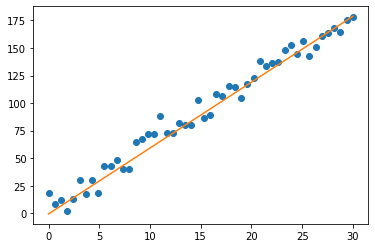

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  writer=tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict={X:x, Y:y})

      summary_epochs=sess.run(merged_summary, feed_dict={X:x, Y:y})
      writer.add_summary(summary_epochs, epoch)
      if not epoch%40:
        W1=sess.run(W)
        B1=sess.run(B)
        cost_iter=sess.run(cost_iteration, feed_dict={X:x, Y:y})
        print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight=sess.run(W)
  Bias=sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight*x_train+Bias)
  plt.show()

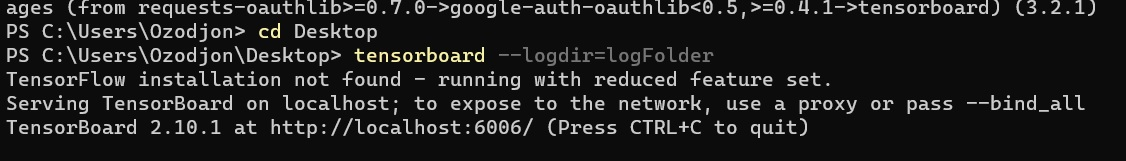

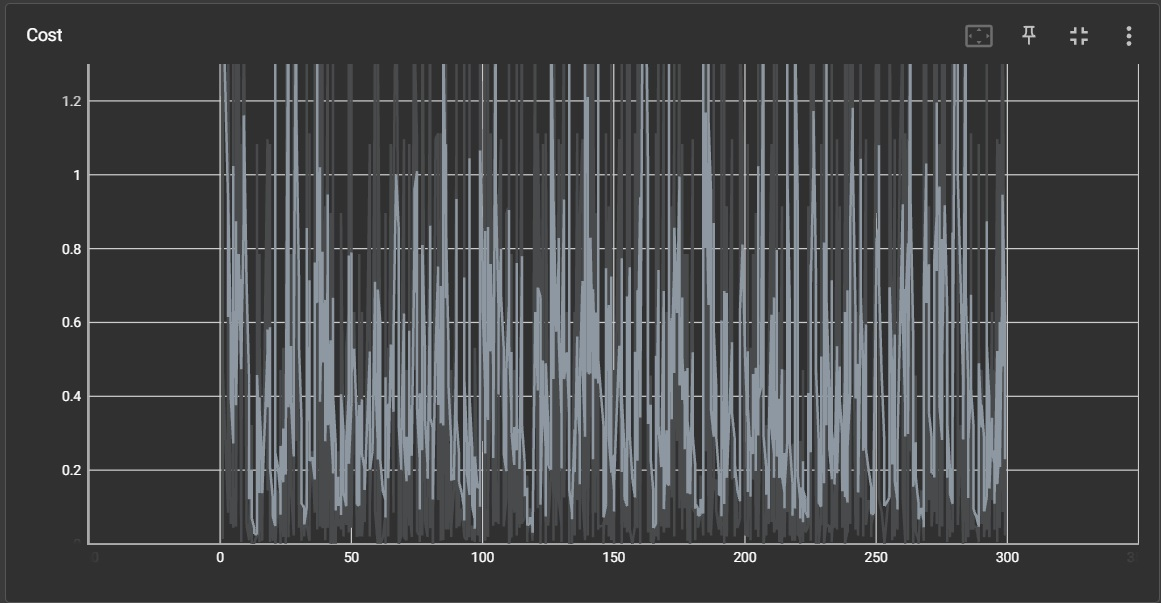

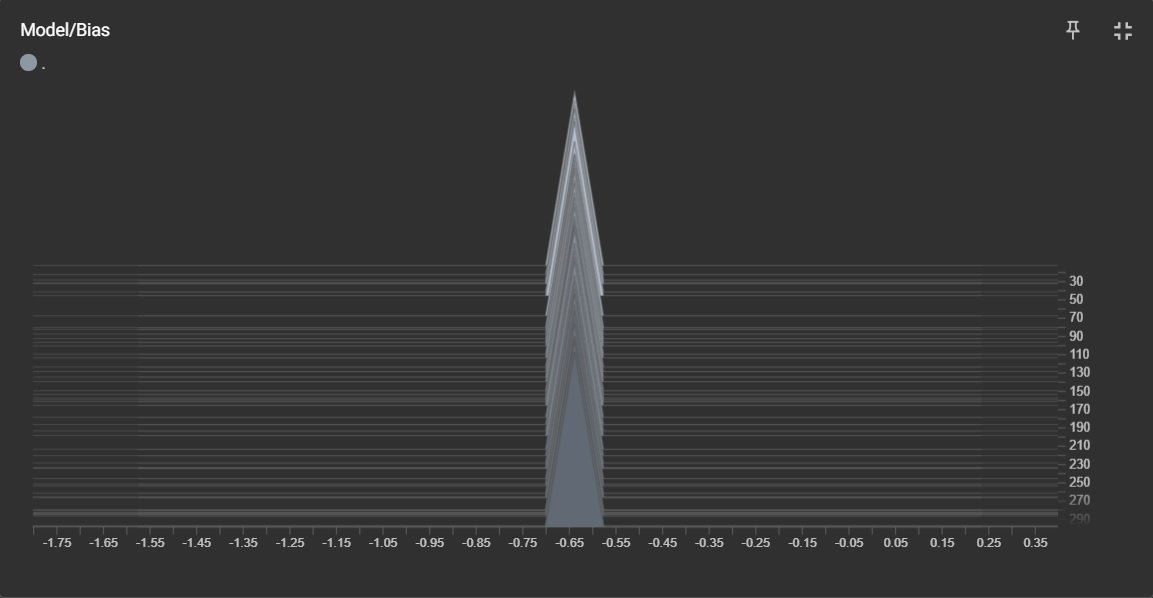

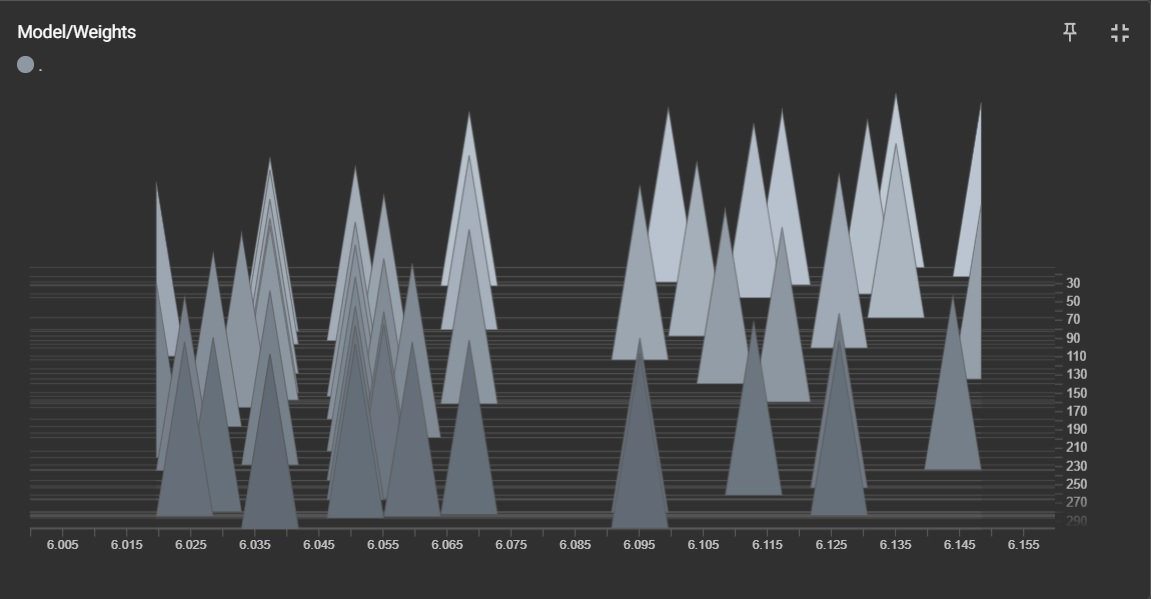

In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


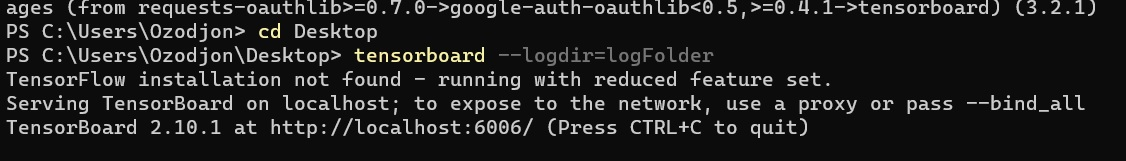

In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip

--2022-10-04 11:06:45--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8454063 (8.1M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.zip’

ngrok-v3-stable-lin 100%[===================>]   8.06M  --.-KB/s    in 0.1s    

2022-10-04 11:06:45 (70.9 MB/s) - ‘ngrok-v3-stable-linux-amd64.zip’ saved [8454063/8454063]



In [ ]:
!unzip ngrok-v3-stable-linux-amd64.zip

Archive:  ngrok-v3-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://5c6a-34-86-24-192.ngrok.io


In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [ ]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")

MNIST Datasize: Training samples: {0}, Testing samples: {1}


In [ ]:
n_input = 784
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_output = 10

In [ ]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [ ]:
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [ ]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout":tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
}

nn_bias = { "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
            "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
            "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
            "B4": tf.Variable(tf.truncated_normal([n_output])),  
           }

In [ ]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]),nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0} , Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))

  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")

Iterations : 0 , Train_loss = 62.75988006591797, Train_Accuracy 0.09375, Val_loss 62.75988006591797, Val_accuracy 0.09375
Iterations : 100 , Train_loss = 7.630047798156738, Train_Accuracy 0.3984375, Val_loss 7.630047798156738, Val_accuracy 0.3984375
Iterations : 200 , Train_loss = 5.156005859375, Train_Accuracy 0.5390625, Val_loss 5.156005859375, Val_accuracy 0.5390625
Iterations : 300 , Train_loss = 4.031378269195557, Train_Accuracy 0.640625, Val_loss 4.031378269195557, Val_accuracy 0.640625
Iterations : 400 , Train_loss = 2.320164203643799, Train_Accuracy 0.7265625, Val_loss 2.320164203643799, Val_accuracy 0.7265625
Iterations : 500 , Train_loss = 3.4700002670288086, Train_Accuracy 0.703125, Val_loss 3.4700002670288086, Val_accuracy 0.703125
Iterations : 600 , Train_loss = 2.6428496837615967, Train_Accuracy 0.7578125, Val_loss 2.6428496837615967, Val_accuracy 0.7578125
Iterations : 700 , Train_loss = 1.9757579565048218, Train_Accuracy 0.7734375, Val_loss 1.9757579565048218, Val_accur

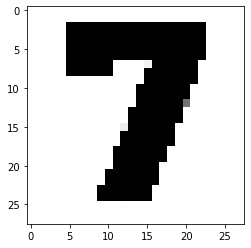

Prediction for test image is [0]


In [ ]:
img = cv2.imread("7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))